<a href="https://colab.research.google.com/github/Naomiweinberger/Neural_Networks/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

Libraries 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
!pip install talos
from keras import regularizers
import talos
from keras import optimizers
from keras.layers import Conv2D, MaxPooling2D 

import pandas as pd
import numpy
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import models
from tensorflow.keras import optimizers
from numpy.random import seed
seed(5)
import tensorflow
tensorflow.random.set_seed(5)

     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 5.4 MB 14.7 MB/s 
     |████████████████████████████████| 9.5 MB 58.1 MB/s 
     |████████████████████████████████| 2.6 MB 41.2 MB/s 
     |████████████████████████████████| 26.6 MB 69 kB/s 
  Created wheel for chances: filename=chances-0.1.9-py3-none-any.whl size=41609 sha256=36d34d9e7ed965a70ee4e619301be821ca204d2fafcc21b90fd7acd5b466e8fa
  Stored in directory: /root/.cache/pip/wheels/f3/2e/7e/316f7da11ccf2195ff05e4a0186a4b5975be9bd0b0004198b6
  Created wheel for kerasplotlib: filename=kerasplotlib-0.1.6-py3-none-any.whl size=3603 sha256=b99e89a53606dfef9f625c26e9b66877ee65b02ee962cf1e1c23807014ee0e1c
  Stored in directory: /root/.cache/pip/wheels/1c/b4/c8/d1533d85f7fc617e3201c3f41b79fe49ae9284c8fc4a5bd4b2
  Created wheel for wrangle: filename=wrangle-0.6.7-py3-none-any.whl size=49895 sha256=8515eab51f5a3de91b560881280d5926a1eb58a00548ec5b1a2263bffd52f862
  Stored in directory: /root/.cach

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

from tensorflow.keras.applications import VGG19

In [ ]:
tf.__version__

'2.6.0'

Data Preprocessing

### Preprocessing the Training set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Flatiron /ZhangLabData.zip" 

Streaming output truncated to the last 5000 lines.
  inflating: CellData/OCT/train/DME/DME-778975-125.jpeg  
  inflating: CellData/OCT/train/DME/DME-258763-26.jpeg  
  inflating: CellData/OCT/train/DME/DME-8457431-23.jpeg  
  inflating: CellData/OCT/train/DME/DME-3304080-55.jpeg  
  inflating: CellData/OCT/train/DME/DME-5006393-70.jpeg  
  inflating: CellData/OCT/train/DME/DME-5091309-15.jpeg  
  inflating: CellData/OCT/train/DME/DME-3064922-181.jpeg  
  inflating: CellData/OCT/train/DME/DME-8525575-184.jpeg  
  inflating: CellData/OCT/train/DME/DME-5143281-26.jpeg  
  inflating: CellData/OCT/train/DME/DME-6737988-35.jpeg  
  inflating: CellData/OCT/train/DME/DME-3064922-202.jpeg  
  inflating: CellData/OCT/train/DME/DME-3531101-20.jpeg  
  inflating: CellData/OCT/train/DME/DME-3157783-58.jpeg  
  inflating: CellData/OCT/train/DME/DME-258763-41.jpeg  
  inflating: CellData/OCT/train/DME/DME-30521-85.jpeg  
  inflating: CellData/OCT/train/DME/DME-5489583-15.jpeg  
  inflating: CellData/

In [ ]:
dataset= "/content/CellData"

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/CellData/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5232 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/CellData/chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
                                          

Found 624 images belonging to 2 classes.


In [ ]:
training_set.class_indices


{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history=cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
164/164 [==============================] - 90s 543ms/step - loss: 0.3515 - accuracy: 0.8421 - val_loss: 0.2897 - val_accuracy: 0.8894
Epoch 2/50
164/164 [==============================] - 89s 540ms/step - loss: 0.2235 - accuracy: 0.9046 - val_loss: 0.2339 - val_accuracy: 0.9038
Epoch 3/50
164/164 [==============================] - 89s 541ms/step - loss: 0.2005 - accuracy: 0.9182 - val_loss: 0.2031 - val_accuracy: 0.9247
Epoch 4/50
164/164 [==============================] - 87s 529ms/step - loss: 0.1922 - accuracy: 0.9209 - val_loss: 0.3217 - val_accuracy: 0.8686
Epoch 5/50
164/164 [==============================] - 87s 529ms/step - loss: 0.1754 - accuracy: 0.9239 - val_loss: 0.1619 - val_accuracy: 0.9487
Epoch 6/50
164/164 [==============================] - 87s 528ms/step - loss: 0.1694 - accuracy: 0.9373 - val_loss: 0.3328 - val_accuracy: 0.8558
Epoch 7/50
164/164 [==============================] - 87s 530ms/step - loss: 0.1629 - accuracy: 0.9375 - val_loss: 0.2631 - val_ac

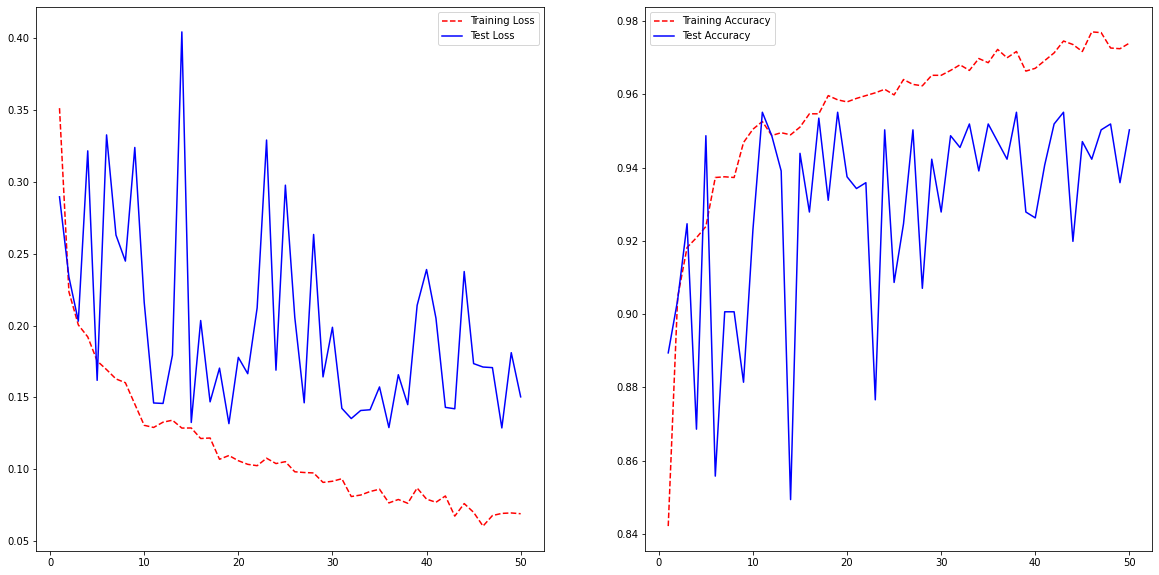

In [ ]:
import matplotlib.pyplot as plt

training_loss = history.history['loss']
test_loss = history.history['val_loss']

training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Visualize loss history
ax1.plot(epoch_count, training_loss, 'r--')
ax1.plot(epoch_count, test_loss, 'b-')
ax1.legend(['Training Loss', 'Test Loss'])

# Visualize accuracy  history
ax2.plot(epoch_count, training_acc, 'r--')
ax2.plot(epoch_count, test_acc, 'b-')
ax2.legend(['Training Accuracy', 'Test Accuracy'])

fig.show();

In [ ]:
pretrained = VGG19(weights='imagenet', 
                 include_top=False, 
                 input_shape=(64,64, 3))
cnn_model = Sequential()
cnn_model.add(pretrained)

for layer in cnn_model.layers:
    layer.trainable=False 
cnn_model.add(tf.keras.layers.Flatten()) 
cnn_model.add(tf.keras.layers.Dense(units=128, activation='relu'))  
cnn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  
cnn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
out = cnn_model.fit(training_set, 
                        validation_data=(test_set),
                        batch_size=50,
                        epochs=10,
                        verbose=1)

Epoch 1/10
164/164 [==============================] - 324s 2s/step - loss: 0.2669 - accuracy: 0.8830 - val_loss: 0.2412 - val_accuracy: 0.9071
Epoch 2/10
164/164 [==============================] - 323s 2s/step - loss: 0.2004 - accuracy: 0.9195 - val_loss: 0.2127 - val_accuracy: 0.9103
Epoch 3/10
164/164 [==============================] - 323s 2s/step - loss: 0.1725 - accuracy: 0.9283 - val_loss: 0.1786 - val_accuracy: 0.9295
Epoch 4/10
164/164 [==============================] - 325s 2s/step - loss: 0.1717 - accuracy: 0.9314 - val_loss: 0.1899 - val_accuracy: 0.9199
Epoch 5/10
164/164 [==============================] - 325s 2s/step - loss: 0.1622 - accuracy: 0.9367 - val_loss: 0.1927 - val_accuracy: 0.9183
Epoch 6/10
164/164 [==============================] - 328s 2s/step - loss: 0.1792 - accuracy: 0.9268 - val_loss: 0.1687 - val_accuracy: 0.9391
Epoch 7/10
164/164 [==============================] - 325s 2s/step - loss: 0.1633 - accuracy: 0.9367 - val_loss: 0.1985 - val_accuracy: 0.9167

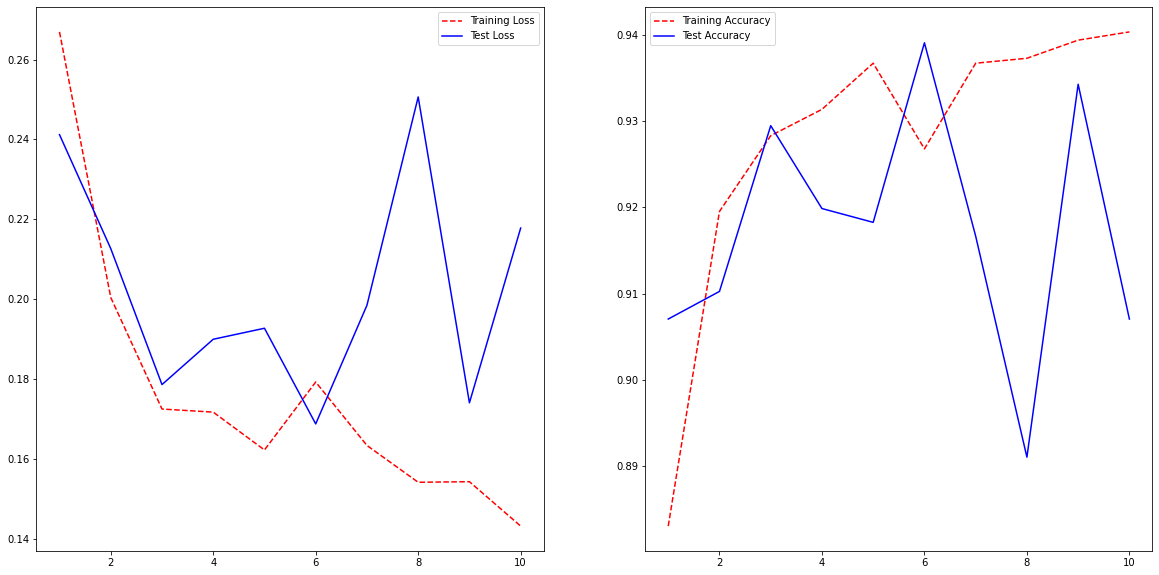

In [ ]:
training_loss = out.history['loss']
test_loss = out.history['val_loss']

training_acc = out.history['accuracy']
test_acc = out.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Visualize loss history
ax1.plot(epoch_count, training_loss, 'r--')
ax1.plot(epoch_count, test_loss, 'b-')
ax1.legend(['Training Loss', 'Test Loss'])

# Visualize accuracy  history
ax2.plot(epoch_count, training_acc, 'r--')
ax2.plot(epoch_count, test_acc, 'b-')
ax2.legend(['Training Accuracy', 'Test Accuracy'])

fig.show();

In [ ]:
def dense_network(X_train, y_train, X_test, y_test, params):
    # we build the model exactly like we would normally do it
    model = Sequential()
    # hidden layers
    model.add(Conv2D(params['nodes1'],kernel_size=(3, 3), input_shape=(64, 64, 3),activation=params['activation1']))
    model.add(Dropout(params['dropout']))
    model.add(Conv2D(params['nodes1'],kernel_size=(3, 3),activation=params['activation1']))
    # output layer
    model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=params['optimizer'], metrics=['accuracy'])
    out = model.fit(X_train, y_train, 
                        validation_data=(X_test, y_test),
                        batch_size=50,
                        epochs=10,
                        verbose=0)
    return out, model

In [ ]:
params = {'nodes1': [40, 50, 60],
          'dropout':  [0.1, 0.3, 0.5],
          'optimizer': ['adam', 'sgd'], 
          'activation1': ['relu', 'tanh'], 
          'activation2': ['relu', 'tanh']}

In [ ]:
X_train, y_train = next(training_set)
X_test, y_test = next(test_set)

  0%|          | 0/24 [16:39<?, ?it/s]


In [ ]:
results = talos.Scan(x = X_train, y= y_train, x_val = X_test, y_val= y_test, params=params, model=dense_network, experiment_name='grid')

100%|██████████| 72/72 [11:38<00:00,  9.71s/it]


In [ ]:
results.best_model(metric='accuracy')

In [ ]:
pd.read_csv('/content/grid/091521160627.csv').sort_values('val_accuracy', ascending=False)

,round_epochs,loss,accuracy,val_loss,val_accuracy,activation1,activation2,dropout,nodes1,optimizer
0,10,0.550783,0.68750,0.647849,0.625,relu,relu,0.1,40,adam
45,10,0.579757,0.68750,0.638924,0.625,tanh,relu,0.3,50,sgd
51,10,0.575570,0.68750,0.644964,0.625,tanh,relu,0.5,50,sgd
50,10,0.992019,0.68750,2.042416,0.625,tanh,relu,0.5,50,adam
49,10,0.569815,0.71875,0.657386,0.625,tanh,relu,0.5,40,sgd
...,...,...,...,...,...,...,...,...,...,...
22,10,0.620433,0.68750,0.666252,0.625,relu,tanh,0.1,60,adam
21,10,0.592758,0.68750,0.650693,0.625,relu,tanh,0.1,50,sgd
20,10,0.579468,0.68750,0.658151,0.625,relu,tanh,0.1,50,adam
71,10,0.570876,0.68750,0.648458,0.625,tanh,tanh,0.5,60,sgd


In [ ]:
model = Sequential()
model.add(Conv2D(100,kernel_size=(3, 3), input_shape=(64, 64, 3),activation='tanh'))
model.add(Dropout(0.1))
model.add(Conv2D(100,kernel_size=(3, 3),activation='tanh'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))  # ------------- see here relu  ------------ #
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
out = model.fit(X_train, y_train, 
                        validation_data=(X_test, y_test),
                        batch_size=50,
                        epochs=10,
                        verbose=1)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.7347 - accuracy: 0.3125 - val_loss: 8.5444 - val_accuracy: 0.6250
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 7.1570 - accuracy: 0.6875 - val_loss: 2.6822 - val_accuracy: 0.3750
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 2.9091 - accuracy: 0.3125 - val_loss: 25.9622 - val_accuracy: 0.3750
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 28.1662 - accuracy: 0.3125 - val_loss: 1.7597 - val_accuracy: 0.6250
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 1.3941 - accuracy: 0.6875 - val_loss: 0.9973 - val_accuracy: 0.6250
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.7857 - accuracy: 0.6875 - val_loss: 0.9711 - val_accuracy: 0.3750
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 1.0203 - accuracy: 0.3125 - val_loss: 2.1001 - val_accuracy: 0.6250
Epoch 8/10
1/1 [=======================